# 카이 제곱 분포

가우시안 정규 분포를 따르는 확률 변수 $X$ 의 $n$개의 샘플 $x_1, \cdots, x_n$의 합(또는 평균)은 샘플 분산으로 정규화하면 스튜던트-t 분포를 따른다는 것을 배웠다. 

그런데 이 샘플들을 단순히 더하는 것이 아니라 제곱을 하여 더하면 양수값만을 가지는 분포가 된다. 이 분포를 카이 제곱(chi-squared) 분포라고 하며 $\chi^2(x;\nu)$ 와 같이 표기한다. 카이 제곱 분포도 student-t 분포처럼 자유도(degree of freedom) 모수를 가진다.

$$ x_i \sim \mathcal{N}(x) $$
$$ \downarrow $$
$$ \sum_{i=1}^n x_i^2 \sim \chi^2(x; n) $$

카이 제곱 분포의 확률 밀도 함수는 다음과 같다.

$$ \chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)} $$

SciPy 의 stats 서브 패키지의 `chi2` 클래스를 사용하여 확률 밀도 함수의 모양을 살펴보면 다음과 같다.

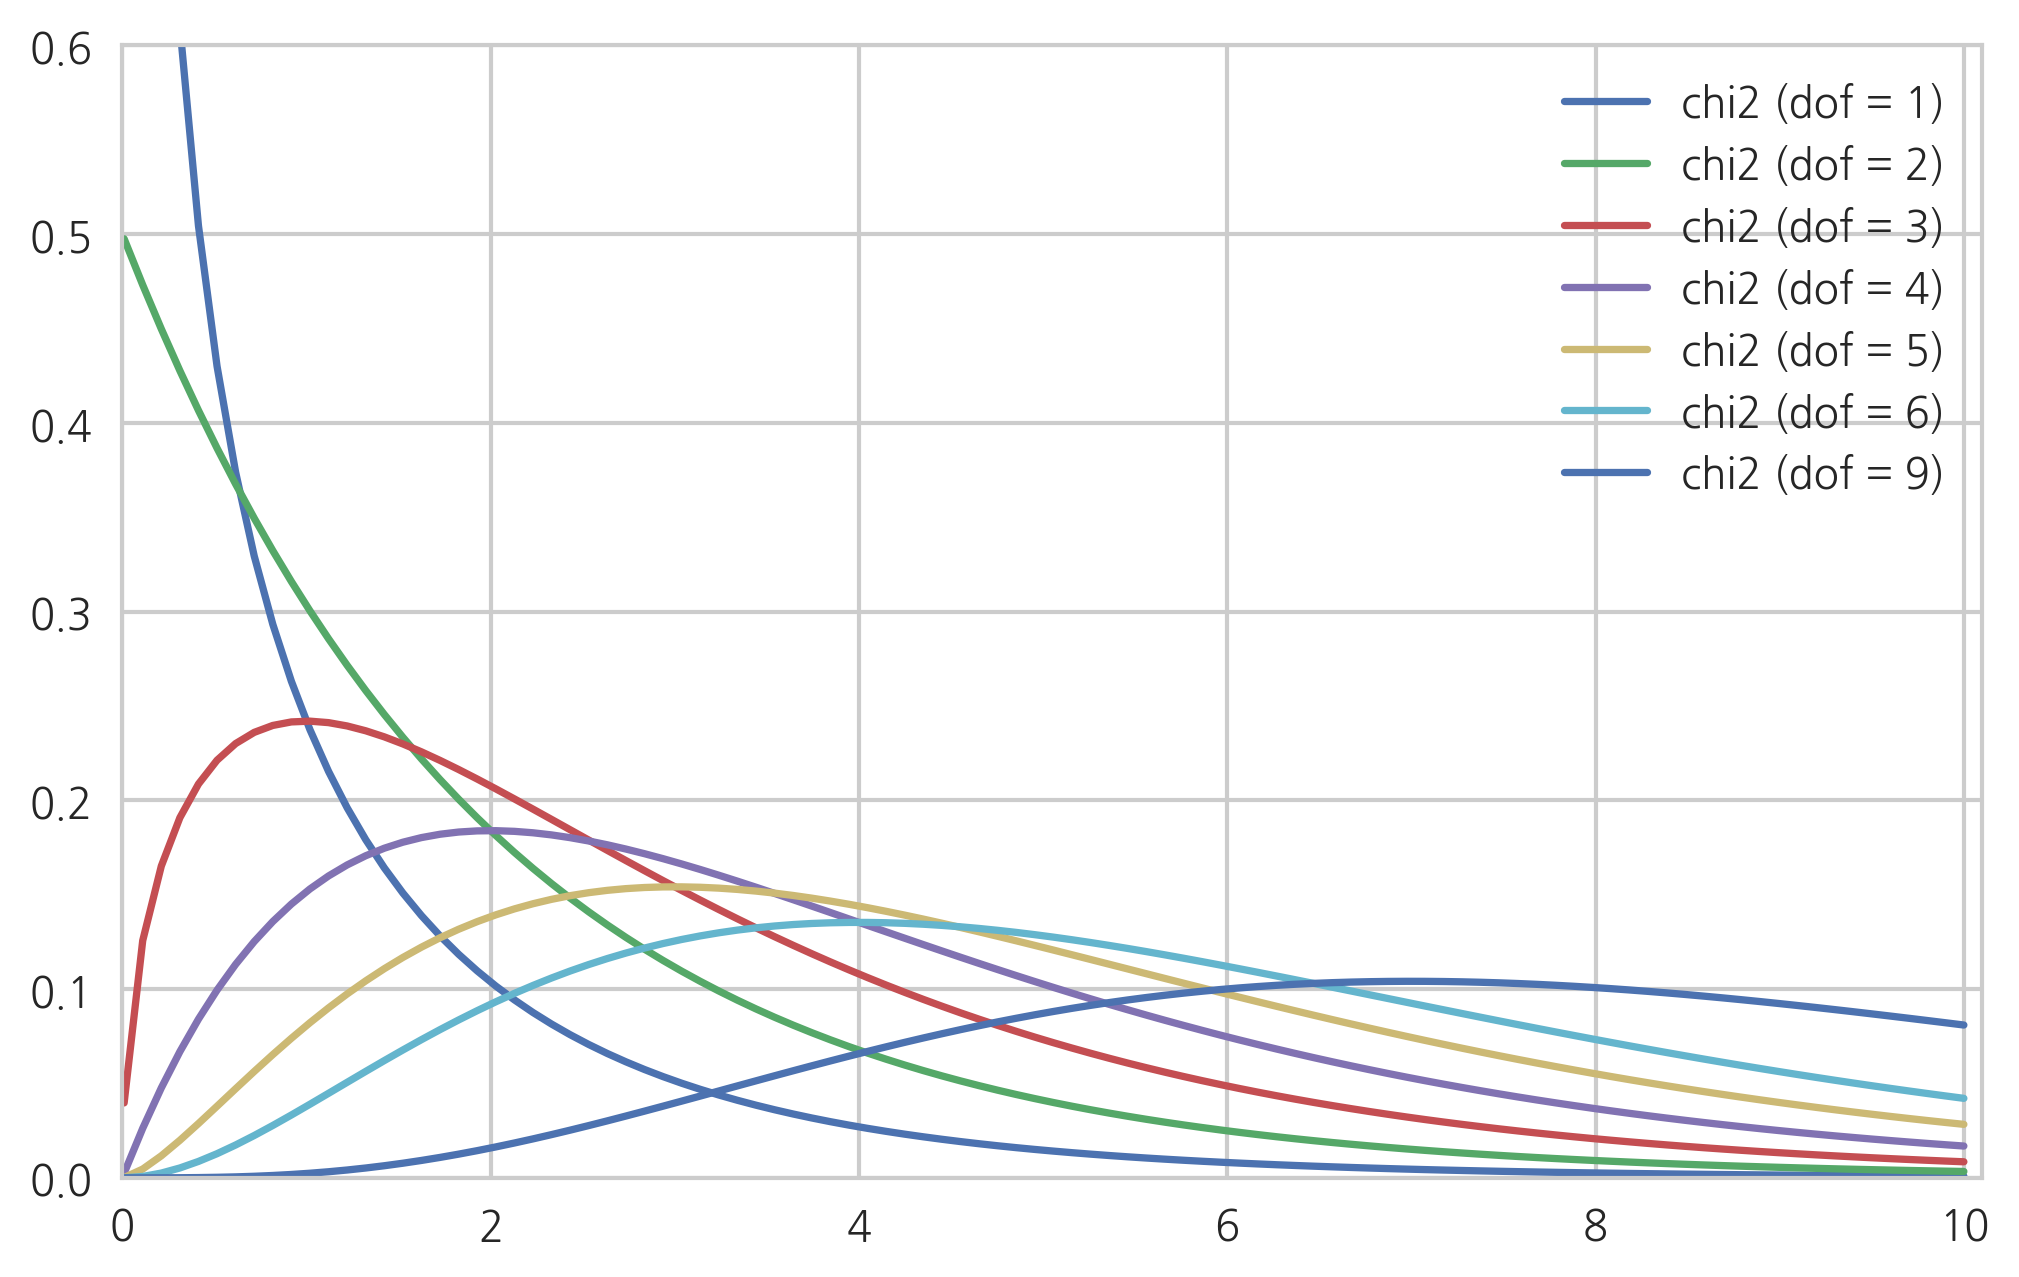

In [1]:
xx = np.linspace(0.01, 10, 100)
for df in [1, 2, 3, 4, 5, 6, 9]:
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), label=("chi2 (dof = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

카이 제곱 분포에서 특이한 점은 제곱합을 하는 샘플의 수가 2보다 커지면 0근처의 값이 가장 많이 발생할 것이라는 직관과 달리 0보다 큰 어떤 수가 더 흔하게 발생한다는 점이다. 시뮬레이션을 통해 실제로 제곱합의 분포를 살펴보면 다음과 같다. 왼쪽은 정규 분포의 샘플을 단순히 제곱한 값의 분포이고 오른쪽은 정규 분포의 샘플 3 개를 제곱하여 합한 값의 분포이다. 오른쪽 분포는 0이 아닌 1 근처의 값이 가장 많이 나오는 것을 볼 수 있다.

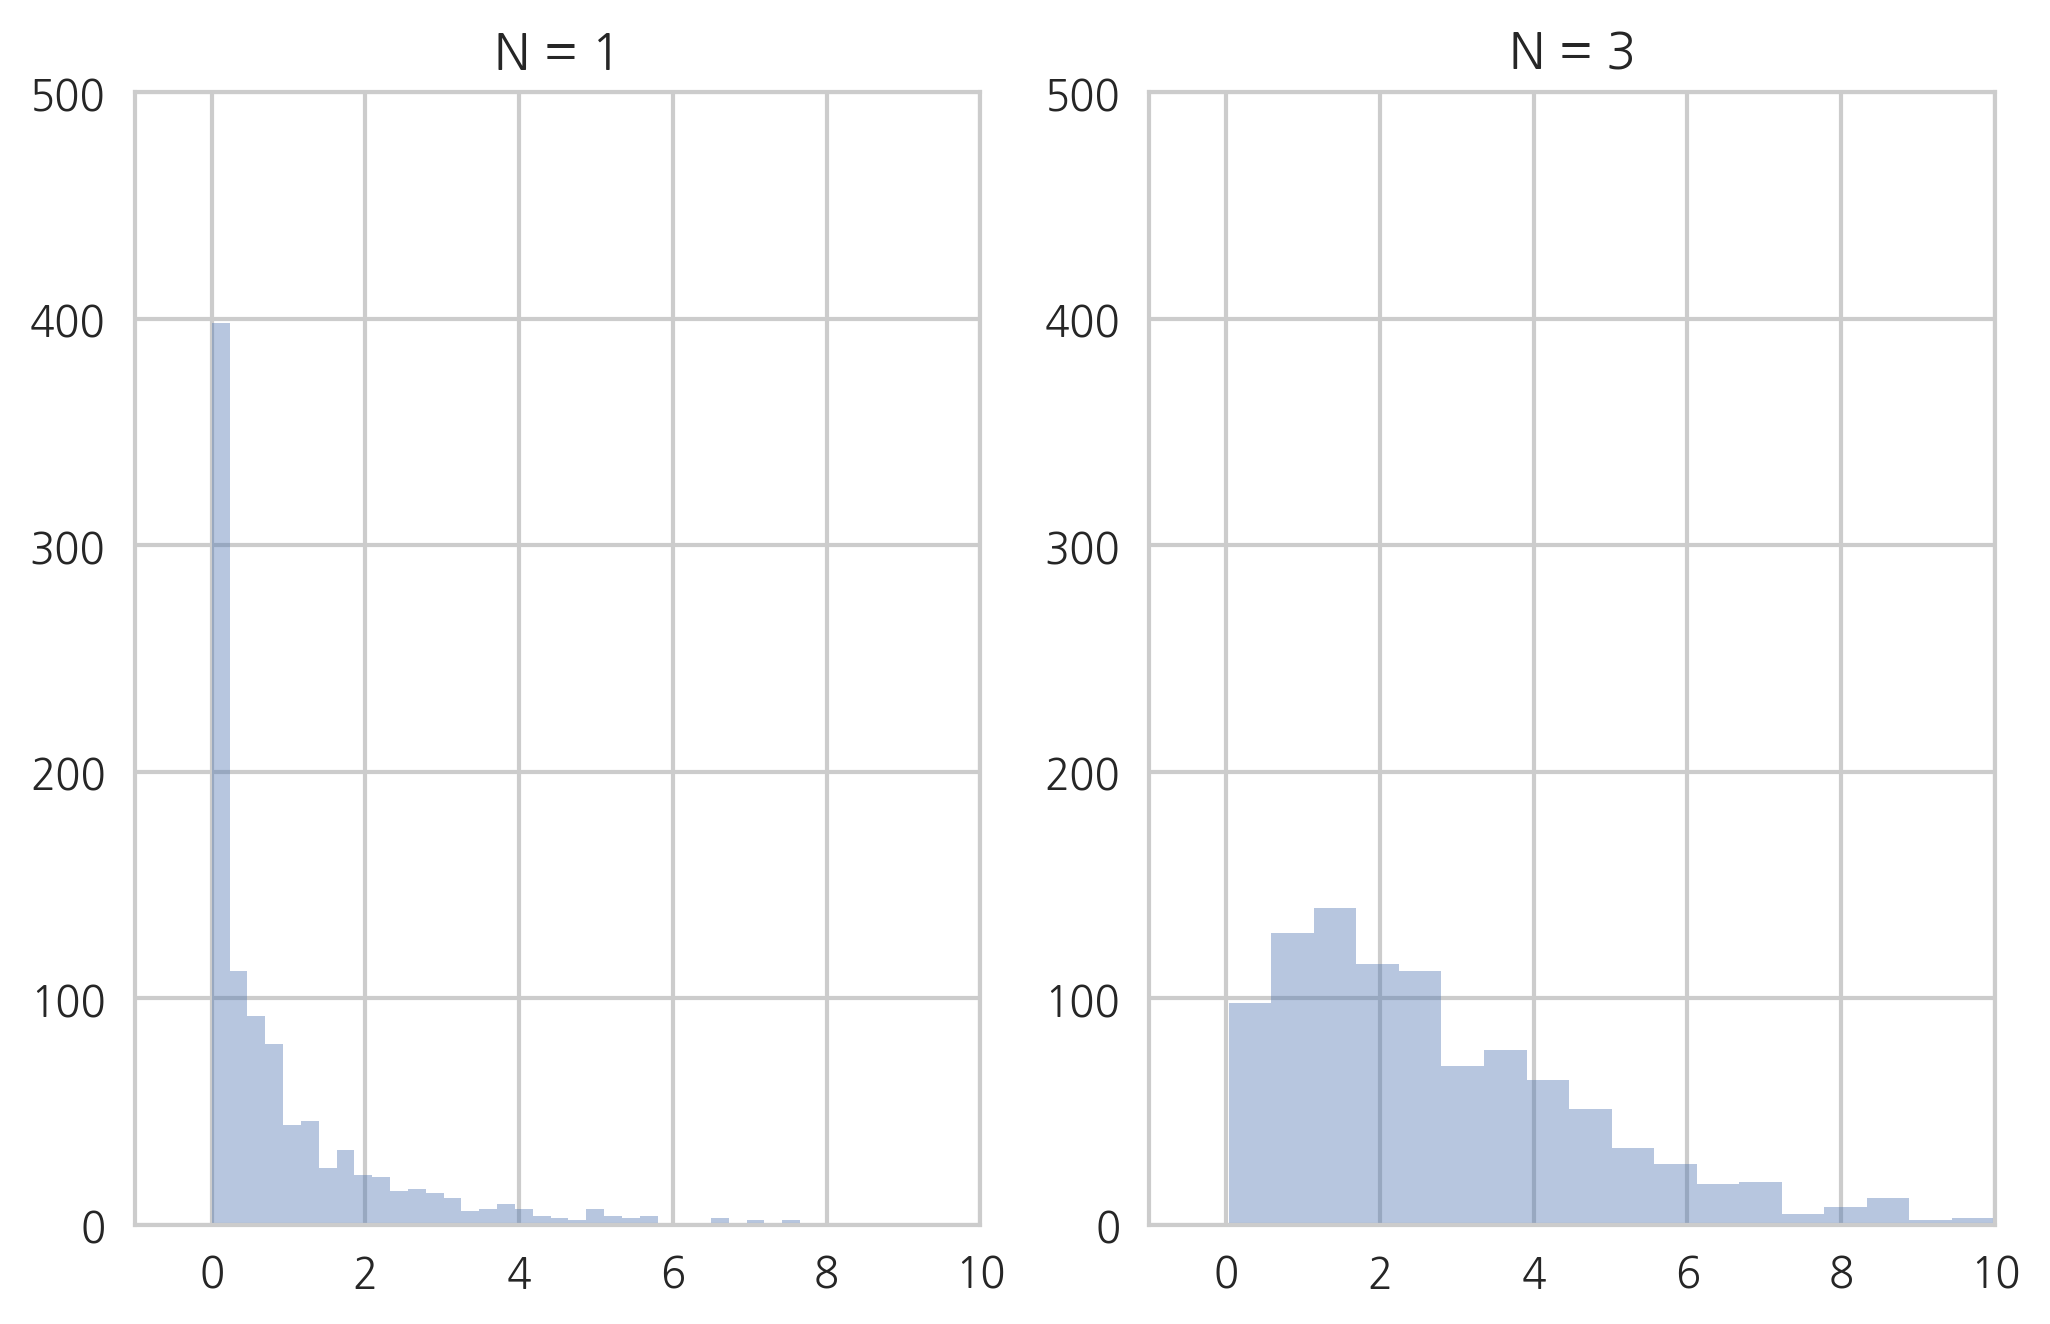

In [8]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 500)
plt.title("N = 1")

plt.subplot(1, 2, 2)
N = 3
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 500)
plt.title("N = 3")

plt.show()